In [54]:
import numpy as np
import pandas as pd
import statsmodels 
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

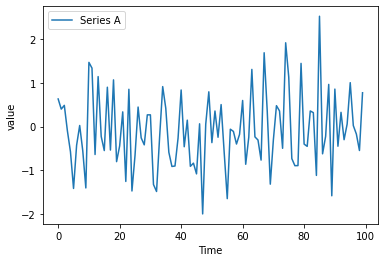

In [16]:
# Series A
params = (0, 1)
T = 100

A = pd.Series(index= range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_datapoint(params)


plt.plot(A)
plt.xlabel('Time')
plt.ylabel('value')
plt.legend(['Series A']);

plt.show()


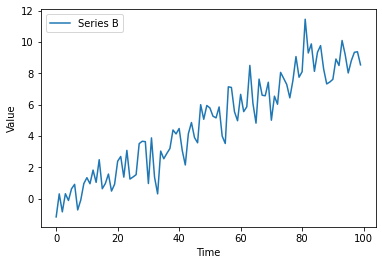

In [19]:
#Series B
T = 100

B = pd.Series(index = range(T))
B.name = 'B'

for t in range(T):
    params = (t*0.1, 1)
    B[t] = generate_datapoint(params)
    
plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B']);

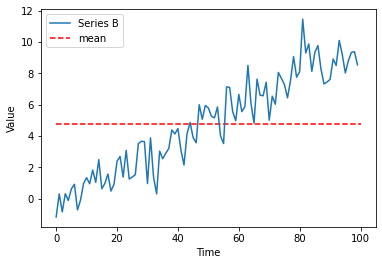

In [20]:
m = np.mean(B)

plt.plot(B)
plt.hlines(m, 0, len(B), linestyle = 'dashed', colors = 'r')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B', 'mean']);

In [30]:
def check_stationarity(X, cutoff = 0.01):
    #H_0 in adfuller is unit root exists (non_staionary)
    #we must observe significant pvalue to convince ourselves that the series is indeed stationary 
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = '+ str(pvalue) + ' The series ' + X.name + ' is likely stationary')
        return True
        
    if pvalue > cutoff:
        print ('p-value = '+ str(pvalue) + ' The series ' + X.name + ' is likely non- stationary')
        return False
    

In [31]:
check_stationarity(A)

p-value = 9.085843550663977e-21 The series A is likely stationary


True

In [32]:
check_stationarity(B)

p-value = 0.7324630337201357 The series B is likely non- stationary


False

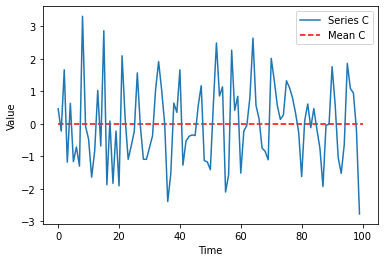

In [37]:
#Series C
m_c = np.mean(C)

T = 100

C = pd.Series( index = range(T))
C.name = 'C'

for t in range(T):
    params = (np.sin(t), 1)
    C[t] = generate_datapoint(params)
    
plt.plot(C)
plt.hlines(m_c, 0, len(C), linestyle = 'dashed', colors = 'r')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series C', 'Mean C']);

In [38]:
check_stationarity(C)

p-value = 0.02835056044340043 The series C is likely non- stationary


False

In [39]:
# now let prepare a series with intergration of order 1 I(1)

# which is done cummutatively summing a series of order 0


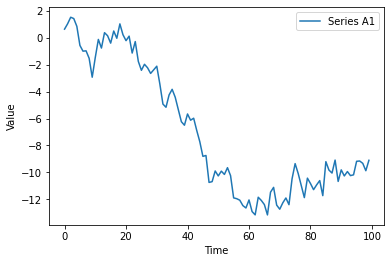

In [46]:
A1 = np.cumsum(A)

plt.plot(A1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A1'])

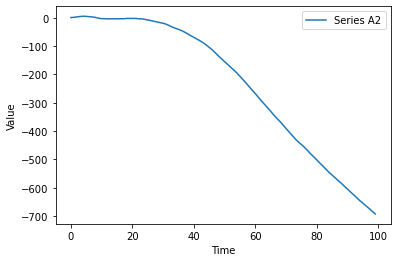

In [47]:
A2 = np.cumsum(A1)

plt.plot(A2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A2'])

p-value = 4.1325066744226976e-14 The series AAdditive Returns is likely stationary


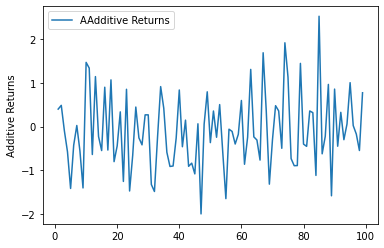

In [49]:
#differencing for first order

A3 = A1.diff()[1:]
A3.name = A1.name + 'Additive Returns'
check_stationarity(A3)
plt.plot(A3.index, A3.values)
plt.ylabel('Additive Returns')
plt.legend([A3.name])


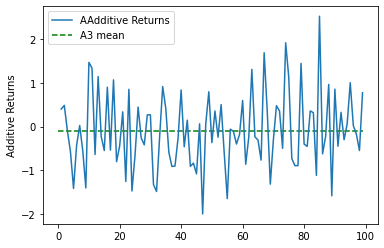

In [55]:
m_A3 = np.mean(A3)
plt.plot(A3.index, A3.values)
plt.hlines(m_A3, 0, len(A3), linestyle = 'dashed', colors = 'g')
plt.ylabel('Additive Returns')
plt.legend([A3.name, 'A3 mean'])


p-value = 0.0030500263126505395 The series AMultiplicative Returns is likely stationary


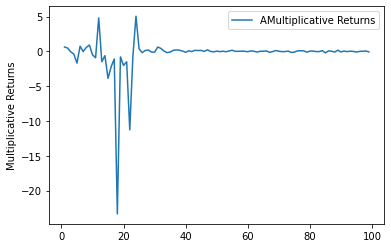

In [56]:
A4 = A1.pct_change()[1:]
A4.name = A1.name + 'Multiplicative Returns'
check_stationarity(A4)
plt.plot(A4.index, A4.values)
plt.ylabel('Multiplicative Returns')
plt.legend([A4.name])

In [58]:
check_stationarity(A1)

p-value = 0.4703950803357689 The series A is likely non- stationary


False